In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
#nltk.download('stopword')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

/home/omraj/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('~/dataset/toxic/train.csv')
df = data
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
df = df[0:20000]

In [6]:
comment_text_train = []
for i in tqdm(range(0,20000)):
    review = re.sub('[^a-zA-Z]', ' ', df['comment_text'][i])
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    review = ' '.join(review)
    comment_text_train.append(review)

100%|██████████| 20000/20000 [06:05<00:00, 54.67it/s]


In [7]:
df['new_comment_text']=comment_text_train

/home/omraj/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.drop(['comment_text'],axis=1,inplace=True)

/home/omraj/.local/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,new_comment_text
0,0000997932d777bf,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,0,0,0,0,0,0,sir hero chance remember page


In [10]:
df=df[['id','new_comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [11]:
df.head()

,id,new_comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0


In [12]:
toxic = df[['new_comment_text','toxic']]

In [13]:
toxic1 = toxic[toxic['toxic']==(1)]

In [14]:
severe_toxic=df[['new_comment_text','severe_toxic']]

In [15]:
severe_toxic1=severe_toxic[severe_toxic['severe_toxic']==(1)]

In [16]:
obscene=df[['new_comment_text','obscene']]

In [17]:
obscene1=obscene[obscene['obscene']==(1)]

In [18]:
threat=df[['new_comment_text','threat']]

In [19]:
threat1=threat[threat['threat']==(1)]

In [20]:
insult=df[['new_comment_text','insult']]

In [21]:
insult1=insult[insult['insult']==(1)]

In [22]:
identity_hate=df[['new_comment_text','identity_hate']]

In [23]:
identity_hate1=toxic[identity_hate['identity_hate']==(1)]

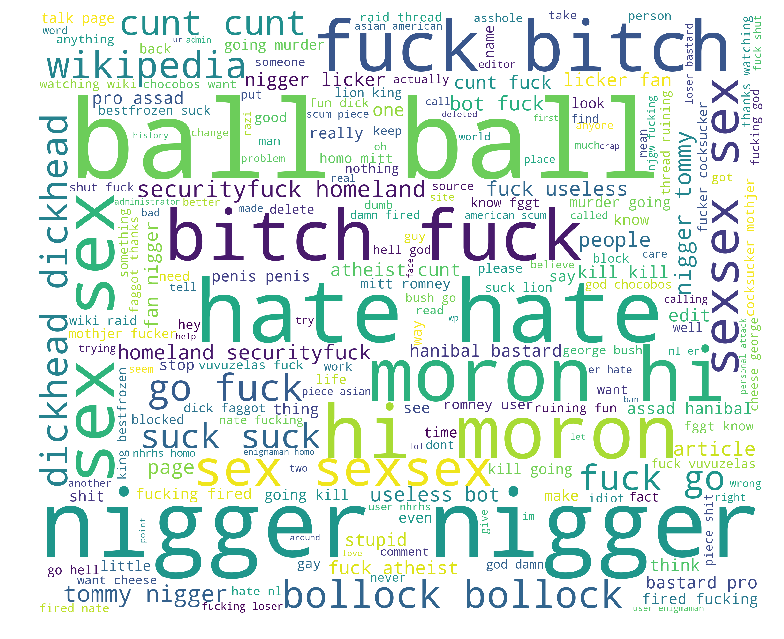

In [24]:
words = ' '.join(toxic1['new_comment_text'])
split_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

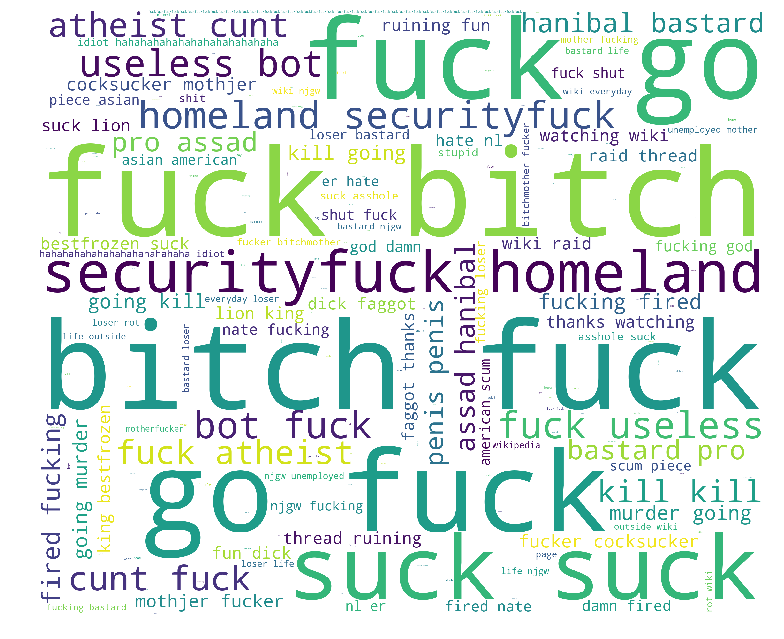

In [25]:
words1 = ' '.join(severe_toxic1['new_comment_text'])
split_word1 = " ".join([word for word in words1.split()])
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word1)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

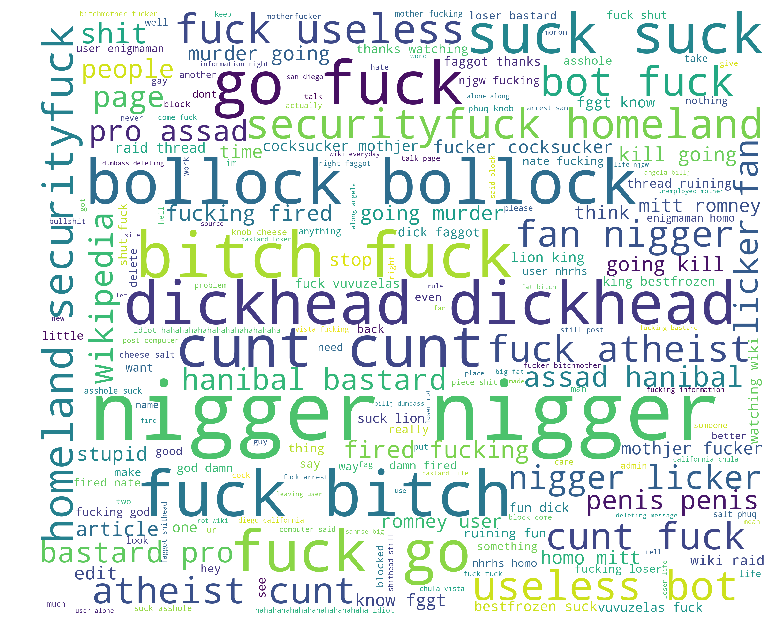

In [26]:
words2 = ' '.join(obscene1['new_comment_text'])
split_word2 = " ".join([word for word in words2.split()])
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word2)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

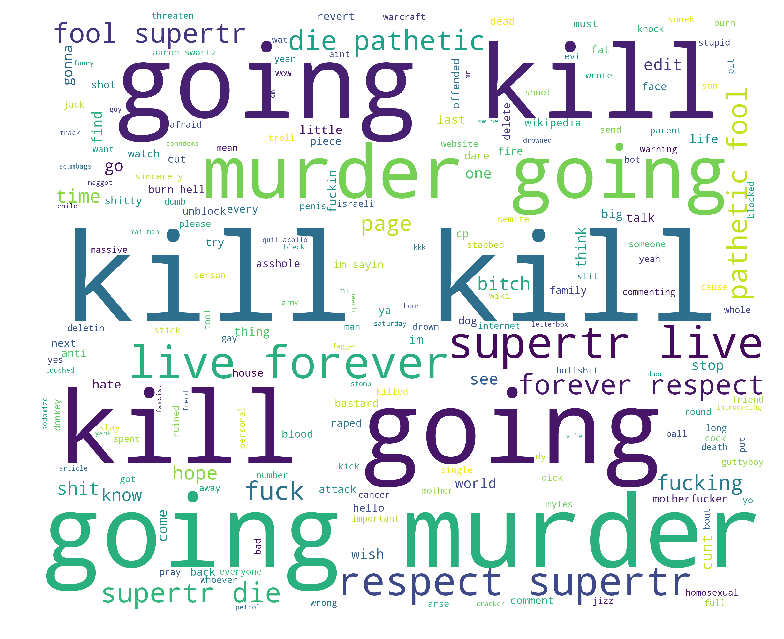

In [27]:
words3 = ' '.join(threat1['new_comment_text'])
split_word3 = " ".join([word for word in words3.split()])
wordcloud3 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word3)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

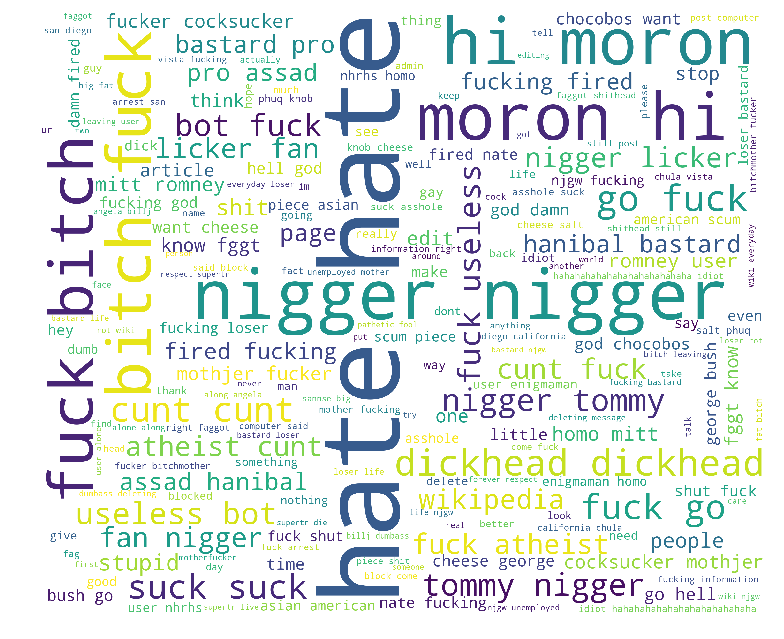

In [28]:
words4 = ' '.join(insult1['new_comment_text'])
split_word4 = " ".join([word for word in words4.split()])
wordcloud4 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word4)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud4)
plt.axis('off')
plt.show()

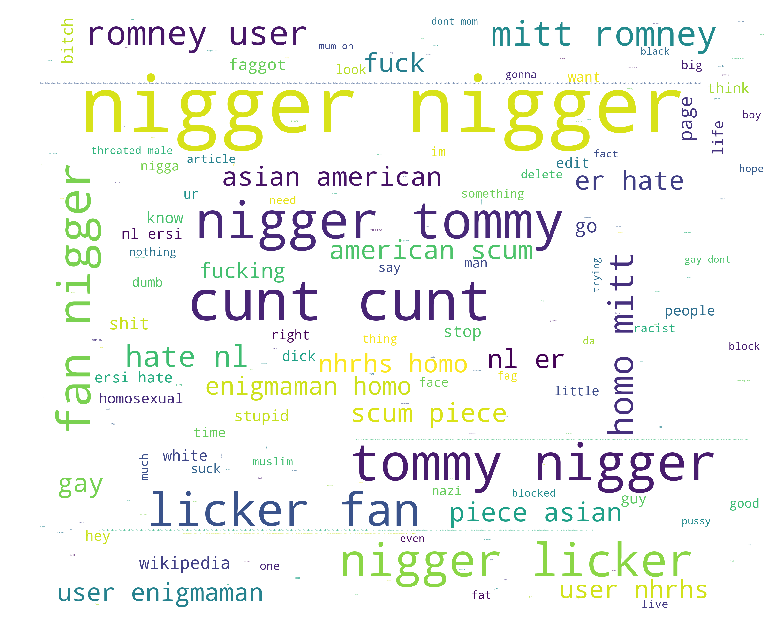

In [29]:
words5 = ' '.join(identity_hate1['new_comment_text'])
split_word5 = " ".join([word for word in words5.split()])
wordcloud5 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word5)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud5)
plt.axis('off')
plt.show()

In [30]:
toxic_2=toxic1['new_comment_text']
severe_toxic2=severe_toxic1['new_comment_text']
obscene2=obscene1['new_comment_text']
threat2=threat1['new_comment_text']
insult2=insult1['new_comment_text']
identity_hate2=identity_hate1['new_comment_text']

In [31]:
vectorizer1 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 
vectorizer2 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 
vectorizer3 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 
vectorizer4 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 
vectorizer5 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 
vectorizer6 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 

In [32]:
toxic_feature = vectorizer1.fit_transform(toxic_2)
toxic_feature=toxic_feature.toarray()
toxic_feature.shape

(1947, 2000)

In [33]:
toxic_feature_vectorize= vectorizer1.get_feature_names()
toxic_feature_vectorize

['ability',
 'able',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'abusing',
 'abusive',
 'academic',
 'accept',
 'acceptable',
 'access',
 'according',
 'account',
 'accurate',
 'accusation',
 'accused',
 'accusing',
 'act',
 'acting',
 'action',
 'activity',
 'actually',
 'adam',
 'add',
 'added',
 'adding',
 'addition',
 'address',
 'admin',
 'administrative',
 'administrator',
 'admins',
 'admit',
 'adult',
 'advice',
 'affair',
 'afghanistan',
 'afraid',
 'africa',
 'age',
 'agenda',
 'agent',
 'aggressor',
 'ago',
 'agree',
 'ah',
 'ahead',
 'aid',
 'aint',
 'al',
 'albanian',
 'album',
 'aleppo',
 'alive',
 'alleged',
 'allemande',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'alright',
 'also',
 'alternative',
 'although',
 'always',
 'america',
 'american',
 'amount',
 'anal',
 'ancestor',
 'angela',
 'angry',
 'animal',
 'annoyed',
 'annoying',
 'anointed',
 'anon',
 'anonymous',
 'another',
 'answer',
 'anti',
 'anus',
 'anybody',
 'anymore

In [34]:
toxic_dist = np.sum(toxic_feature, axis=0)
for tag, count in zip(toxic_feature_vectorize, toxic_dist):
    print (tag,count)

ability 8
able 16
absolute 6
absolutely 13
abuse 29
abused 5
abusing 4
abusive 10
academic 4
accept 10
acceptable 4
access 5
according 6
account 31
accurate 7
accusation 6
accused 5
accusing 11
act 25
acting 15
action 19
activity 8
actually 53
adam 5
add 27
added 30
adding 7
addition 5
address 26
admin 60
administrative 4
administrator 41
admins 32
admit 13
adult 13
advice 5
affair 5
afghanistan 6
afraid 4
africa 5
age 11
agenda 9
agent 4
aggressor 5
ago 17
agree 15
ah 4
ahead 25
aid 4
aint 8
al 13
albanian 5
album 9
aleppo 18
alive 6
alleged 6
allemande 8
allow 9
allowed 14
almost 7
alone 47
along 32
alot 6
already 31
alright 4
also 95
alternative 5
although 7
always 25
america 9
american 81
amount 4
anal 6
ancestor 4
angela 24
angry 4
animal 9
annoyed 8
annoying 7
anointed 5
anon 7
anonymous 5
another 47
answer 27
anti 33
anus 5
anybody 4
anymore 20
anyone 46
anything 64
anyway 18
apparent 4
apparently 18
appear 6
appreciate 4
appropriate 7
approved 4
arab 11
arabic 5
arbitration 14


nate 58
nation 10
nationalism 5
nationalist 8
native 5
nature 7
nazi 46
necessary 6
need 79
needed 4
negative 7
negro 4
neither 6
neo 6
nerd 14
nerve 5
neutral 8
never 65
new 53
news 7
next 15
ng 4
nhrhs 44
nice 34
nick 4
nigga 12
nigger 1051
night 10
njgw 71
nl 64
nobody 18
non 14
none 11
nonsense 10
normal 12
normally 4
north 4
northern 4
nose 7
notable 5
note 19
nothing 93
notice 20
noticed 4
npov 11
number 16
nut 7
object 4
obvious 9
obviously 24
offended 7
offense 5
offensive 6
official 17
often 8
oh 63
ohio 5
ok 28
okay 8
old 46
one 187
online 8
open 17
openly 4
operator 6
opinion 48
opposite 4
order 8
org 15
organisation 4
organization 7
orientation 4
original 11
others 25
otherwise 7
otherwords 9
ought 5
outside 29
owner 4
ownership 4
pagan 4
page 359
paglia 8
paid 8
painful 4
pan 4
paper 6
paragraph 5
parent 63
park 5
part 19
particular 7
partisan 4
party 4
pas 5
past 12
patent 5
paterson 9
pathetic 63
paul 9
pay 9
pc 5
pedophile 5
pee 5
penis 148
people 223
per 9
perfect 6
pe

In [35]:
toxic_new= pd.DataFrame(toxic_dist)
toxic_new.columns=['word_count']
toxic_new['word'] = pd.Series(toxic_feature_vectorize, index=toxic_new.index)
toxic_new_1=toxic_new[['word','word_count']]
toxic_new_top_15=toxic_new_1.sort_values(['word_count'],ascending=[0])
toxic_new_top_15.head(15)

,word,word_count
697,fuck,1613
1210,nigger,1051
148,ball,856
113,as,811
1569,sex,728
795,hate,683
737,go,570
1039,like,560
703,fucking,544
410,cunt,522


In [36]:
severe_toxic_feature = vectorizer2.fit_transform(severe_toxic2)
severe_toxic_feature=severe_toxic_feature.toarray()
severe_toxic_feature.shape

(222, 1658)

In [37]:
severe_feature_vectorize= vectorizer2.get_feature_names()
severe_feature_vectorize

['abandoned',
 'able',
 'absolute',
 'abuse',
 'abusive',
 'abysmal',
 'access',
 'accompanying',
 'account',
 'accuse',
 'act',
 'action',
 'actually',
 'add',
 'address',
 'administrator',
 'admins',
 'adult',
 'age',
 'agent',
 'ahead',
 'aint',
 'akhtak',
 'alive',
 'alleged',
 'allowed',
 'alone',
 'also',
 'america',
 'american',
 'americus',
 'amuse',
 'amusement',
 'amusing',
 'anal',
 'anatomically',
 'angry',
 'animation',
 'announced',
 'anonymous',
 'another',
 'anus',
 'anything',
 'aol',
 'appeal',
 'appetite',
 'apple',
 'arc',
 'aristocrat',
 'around',
 'arse',
 'article',
 'artless',
 'as',
 'asian',
 'asinine',
 'assad',
 'assface',
 'asshole',
 'association',
 'asten',
 'asyou',
 'atheist',
 'attack',
 'attacked',
 'attempt',
 'attempting',
 'attention',
 'attitude',
 'author',
 'authority',
 'available',
 'avoid',
 'away',
 'awbern',
 'awesome',
 'awsome',
 'awww',
 'baby',
 'back',
 'backwards',
 'bad',
 'bag',
 'bailey',
 'baked',
 'baklava',
 'ball',
 'ballz',
 '

In [38]:
severe_dist = np.sum(severe_toxic_feature, axis=0)
for tag, count in zip(severe_feature_vectorize, severe_dist):
    print (tag,count)

abandoned 1
able 3
absolute 2
abuse 3
abusive 2
abysmal 1
access 1
accompanying 1
account 3
accuse 1
act 3
action 1
actually 1
add 2
address 3
administrator 1
admins 2
adult 5
age 3
agent 3
ahead 5
aint 2
akhtak 1
alive 1
alleged 1
allowed 1
alone 1
also 3
america 1
american 52
americus 1
amuse 1
amusement 1
amusing 1
anal 1
anatomically 2
angry 1
animation 1
announced 1
anonymous 1
another 3
anus 1
anything 5
aol 1
appeal 1
appetite 2
apple 2
arc 1
aristocrat 1
around 5
arse 5
article 4
artless 1
as 719
asian 50
asinine 1
assad 134
assface 1
asshole 55
association 1
asten 1
asyou 1
atheist 178
attack 5
attacked 1
attempt 1
attempting 1
attention 2
attitude 1
author 1
authority 2
available 1
avoid 1
away 7
awbern 1
awesome 1
awsome 1
awww 1
baby 1
back 8
backwards 1
bad 4
bag 4
bailey 1
baked 1
baklava 1
ball 1
ballz 1
ban 2
band 1
bang 1
banging 1
banned 1
barf 1
base 1
bastard 216
bat 1
beak 1
beast 1
beat 2
becaus 1
becuse 1
beef 1
begin 5
behind 1
belief 1
believe 2
belonging 1
ben

hesitate 1
hexachord 1
hey 14
hi 3
high 2
hijo 1
hippy 1
hire 2
history 2
hit 1
hobby 1
hobo 1
hockey 2
hoe 1
hold 1
hole 5
holy 1
homeland 227
homo 1
homosexual 5
hooker 5
hope 16
hopeless 1
horny 2
horribly 1
horse 1
horseshit 1
hot 1
hour 1
house 3
huge 1
husband 1
idea 1
ideot 1
idioooot 1
idiot 33
idle 1
igho 1
ignoble 1
ignoramus 1
ignorant 1
ignore 1
ill 7
illuminati 1
im 3
imagery 1
immature 1
important 2
impress 1
in 1
incest 1
inch 1
incident 1
incorrect 2
incredibly 1
inexperienced 1
info 1
information 3
insane 1
insensate 1
insight 1
instead 3
instruction 1
intellect 1
intelligent 1
internet 1
involve 1
ip 6
islam 1
islamic 1
itnc 1
jackass 1
jam 1
jawed 1
jd 2
jebani 1
jeff 1
jerk 5
jerkoff 1
jew 1
jigaboo 1
jlatondre 1
job 2
john 2
joke 1
joking 1
jolly 1
jonathon 1
jose 1
josh 2
jossel 1
jump 1
jumped 1
jus 2
kafziel 1
ked 1
keep 1
kick 4
kid 2
kidding 1
kiddy 2
kike 1
kill 256
killed 1
kind 2
kinda 1
kindly 1
king 69
kingdom 1
kingston 1
kiss 2
kissing 2
kkk 1
knew 2
kn

In [39]:
severe_new= pd.DataFrame(severe_dist)
severe_new.columns=['word_count']
severe_new['word'] = pd.Series(severe_feature_vectorize, index=severe_new.index)
severe_new_1=severe_new[['word','word_count']]
severe_new_top_15=severe_new_1.sort_values(['word_count'],ascending=[0])
severe_new_top_15.head(15)

,word,word_count
549,fuck,1199
53,as,719
1401,suck,393
124,bitch,376
597,go,319
558,fucking,306
770,kill,256
1253,securityfuck,227
685,homeland,227
1536,useless,220


In [40]:
obscene_feature = vectorizer3.fit_transform(obscene2)
obscene_feature=obscene_feature.toarray()
obscene_feature.shape

(1077, 2000)

In [41]:
obscene_feature_vectorize= vectorizer3.get_feature_names()
obscene_feature_vectorize

['able',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'abusive',
 'accept',
 'account',
 'accusation',
 'accusing',
 'act',
 'acting',
 'action',
 'activity',
 'actually',
 'add',
 'added',
 'addition',
 'address',
 'admin',
 'administrator',
 'admins',
 'admit',
 'adult',
 'advice',
 'afraid',
 'age',
 'agenda',
 'agent',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aint',
 'airport',
 'al',
 'album',
 'aleem',
 'aleppo',
 'alive',
 'alleged',
 'allemande',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'also',
 'alternative',
 'always',
 'america',
 'american',
 'andpieces',
 'angela',
 'angry',
 'ani',
 'animal',
 'anime',
 'anon',
 'anonymous',
 'another',
 'answer',
 'anti',
 'anus',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apologize',
 'apparently',
 'appear',
 'apple',
 'appreciate',
 'appropriate',
 'arab',
 'archive',
 'area',
 'argue',
 'argument',
 'armor',
 'army',
 'around',
 'arrest',
 'arse',
 'article',
 'artist',
 'as',
 '

In [42]:
obscene_dist = np.sum(obscene_feature, axis=0)
for tag, count in zip(obscene_feature_vectorize,obscene_dist):
    print (tag,count)

able 10
absolute 4
absolutely 6
abuse 7
abused 3
abusive 6
accept 4
account 21
accusation 4
accusing 3
act 9
acting 7
action 3
activity 4
actually 29
add 11
added 14
addition 5
address 12
admin 16
administrator 14
admins 18
admit 11
adult 7
advice 5
afraid 3
age 5
agenda 3
agent 3
ago 7
agree 5
ahead 11
aid 3
aint 7
airport 3
al 6
album 5
aleem 19
aleppo 10
alive 3
alleged 6
allemande 8
allow 3
allowed 8
almost 4
alone 38
along 30
alot 4
already 19
also 52
alternative 5
always 11
america 9
american 12
andpieces 3
angela 24
angry 3
ani 3
animal 5
anime 4
anon 5
anonymous 5
another 35
answer 4
anti 3
anus 4
anymore 7
anyone 22
anything 35
anyway 10
anywhere 3
apologize 3
apparently 3
appear 3
apple 3
appreciate 4
appropriate 3
arab 4
archive 3
area 3
argue 4
argument 3
armor 6
army 6
around 23
arrest 29
arse 9
article 101
artist 4
as 814
ask 13
asked 7
asking 4
ass 3
assad 174
asshole 124
assume 4
asswipe 3
atheist 178
attack 30
attacked 3
attacking 4
attempt 7
attempting 3
attention 8
a

lock 4
lofton 2
log 6
logic 2
login 2
lol 20
lolololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololol 6
lolz 2
lonely 3
long 20
longer 2
look 37
looked 5
looking 7
loony 2
loose 2
lord 2
loser 117
lost 5
lot 13
louis 2
lout 2
love 22
loved 2
lover 2
low 5
luck 2
lunatic 2
lying 7
mac 2
macedonian 2
mad 3
made 25
maggot 5
mail 4
mailbox 2
mailman 2
main 7
major 5
majority 5
make 69
making 24
malcolm 4
male 2
malleus 2
mama 2
man 34
manage 2
manchu 4
manga 2
manner 2
many 45
map 2
mar 2
march 2
marcus 2
mark 16
mass 4
massacre 3
massive 8
master 2
masturbating 2
masturbation 3
match 2
mate 3
mathematical 2
matt 2
matter 14
maurice 2
may 16
maybe 13
mcneight 3
mean 38
meaning 8
meaningless 3
meant 3
meanwhile 3
med 2
medium 5
meeting 4
mel 2
melon 2
member 10
men 25
ment 2
mental 3
mention 4
mentioned 5
mentioning 3
merely

youre 10
ytmnd 3
zionist 3
zuck 20
zuckerberg 17
zuckerbergs 2


In [43]:
obscene_new= pd.DataFrame(obscene_dist)
obscene_new.columns=['word_count']
obscene_new['word'] = pd.Series(obscene_feature_vectorize, index=obscene_new.index)
obscene_new_1=obscene_new[['word','word_count']]
obscene_new_top_15=obscene_new_1.sort_values(['word_count'],ascending=[0])
obscene_new_top_15.head(15)

,word,word_count
578,fuck,1604
89,as,814
1188,nigger,812
586,fucking,536
341,cunt,520
1746,suck,467
157,bitch,457
629,go,412
974,like,330
171,bollock,323


In [44]:
threat_feature = vectorizer4.fit_transform(threat2)
threat_feature=threat_feature.toarray()
threat_feature.shape

(67, 615)

In [45]:
threat_feature_vectorize= vectorizer4.get_feature_names()
threat_feature_vectorize

['aaron',
 'abuse',
 'account',
 'acting',
 'action',
 'afraid',
 'africa',
 'afterwards',
 'ago',
 'aint',
 'alight',
 'allison',
 'alone',
 'also',
 'always',
 'america',
 'andf',
 'another',
 'anthony',
 'anti',
 'anus',
 'anymore',
 'anyone',
 'anything',
 'aol',
 'area',
 'argument',
 'army',
 'arrange',
 'arse',
 'article',
 'as',
 'ashamed',
 'asia',
 'asshole',
 'attack',
 'autoblock',
 'autobot',
 'away',
 'back',
 'bad',
 'ball',
 'banned',
 'barnabay',
 'bastard',
 'best',
 'bettah',
 'bich',
 'big',
 'biggest',
 'bill',
 'bitch',
 'bleck',
 'bleeds',
 'block',
 'blocked',
 'blood',
 'blowing',
 'blurb',
 'bodie',
 'body',
 'boi',
 'bomb',
 'bot',
 'bothering',
 'bottle',
 'bounty',
 'bourdain',
 'bout',
 'bp',
 'bring',
 'bruh',
 'brybon',
 'buck',
 'buddy',
 'bulgarian',
 'bullshit',
 'bump',
 'buried',
 'burn',
 'bye',
 'call',
 'called',
 'cancer',
 'cannot',
 'cant',
 'care',
 'carry',
 'cause',
 'cell',
 'century',
 'certain',
 'chair',
 'change',
 'changin',
 'chaos',

In [46]:
threat_dist = np.sum(threat_feature, axis=0)
for tag, count in zip(threat_feature_vectorize,threat_dist):
    print (tag,count)

aaron 2
abuse 1
account 1
acting 1
action 1
afraid 2
africa 1
afterwards 1
ago 1
aint 2
alight 1
allison 1
alone 1
also 2
always 1
america 1
andf 1
another 1
anthony 1
anti 3
anus 1
anymore 1
anyone 1
anything 1
aol 1
area 1
argument 1
army 1
arrange 1
arse 2
article 1
as 694
ashamed 1
asia 1
asshole 3
attack 3
autoblock 1
autobot 1
away 2
back 3
bad 2
ball 2
banned 1
barnabay 1
bastard 3
best 1
bettah 1
bich 1
big 4
biggest 1
bill 1
bitch 9
bleck 1
bleeds 1
block 1
blocked 2
blood 3
blowing 1
blurb 1
bodie 1
body 1
boi 1
bomb 1
bot 2
bothering 1
bottle 1
bounty 1
bourdain 1
bout 2
bp 1
bring 1
bruh 1
brybon 1
buck 1
buddy 1
bulgarian 1
bullshit 2
bump 1
buried 1
burn 5
bye 1
call 1
called 1
cancer 2
cannot 1
cant 1
care 1
carry 1
cause 2
cell 1
century 1
certain 1
chair 1
change 1
changin 1
chaos 1
child 1
chink 1
choice 1
choke 1
church 1
ckckckck 1
clay 1
cock 2
cockmaster 1
collect 1
college 1
com 2
come 5
comment 3
commenting 2
complaint 1
computer 1
concerned 1
conndoms 1
connect

In [47]:
threat_new= pd.DataFrame(threat_dist)
threat_new.columns=['word_count']
threat_new['word'] = pd.Series(threat_feature_vectorize, index=threat_new.index)
threat_new_1=threat_new[['word','word_count']]
threat_new_top_15=threat_new_1.sort_values(['word_count'],ascending=[0])
threat_new_top_15.head(15)

,word,word_count
31,as,694
292,kill,267
227,going,207
353,murder,102
514,supertr,46
150,die,41
313,live,29
390,pathetic,25
204,forever,24
431,respect,23


In [48]:
insult_feature = vectorizer5.fit_transform(insult2)
insult_feature=insult_feature.toarray()
insult_feature.shape

(1021, 2000)

In [49]:
insult_feature_vectorize= vectorizer5.get_feature_names()
insult_feature_vectorize

['aaron',
 'abd',
 'ability',
 'able',
 'absently',
 'absolute',
 'absolutely',
 'abuse',
 'abuser',
 'abusing',
 'abusive',
 'accept',
 'according',
 'account',
 'accurate',
 'accusation',
 'accusing',
 'acknowledge',
 'across',
 'act',
 'acting',
 'action',
 'actively',
 'actually',
 'adam',
 'add',
 'added',
 'addition',
 'address',
 'admin',
 'administrative',
 'administrator',
 'admins',
 'adminship',
 'admit',
 'adult',
 'advice',
 'affect',
 'afraid',
 'africa',
 'african',
 'age',
 'agency',
 'agent',
 'ago',
 'agree',
 'ah',
 'ahead',
 'aid',
 'aint',
 'airport',
 'aj',
 'aka',
 'al',
 'album',
 'ali',
 'alive',
 'allah',
 'allegation',
 'alleged',
 'allemande',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'also',
 'alumnus',
 'always',
 'amazing',
 'amendment',
 'america',
 'american',
 'among',
 'amount',
 'anal',
 'anatomically',
 'ancestor',
 'angela',
 'angle',
 'angry',
 'ani',
 'animal',
 'animalfucker',
 'anime',
 'annoying',
 'anonymous',

In [50]:
insult_dist = np.sum(insult_feature, axis=0)
for tag, count in zip(insult_feature_vectorize,insult_dist):
    print (tag,count)


aaron 2
abd 2
ability 3
able 8
absently 2
absolute 3
absolutely 5
abuse 9
abuser 2
abusing 3
abusive 4
accept 5
according 3
account 15
accurate 2
accusation 4
accusing 4
acknowledge 2
across 4
act 11
acting 8
action 2
actively 2
actually 26
adam 2
add 12
added 12
addition 3
address 16
admin 15
administrative 2
administrator 11
admins 15
adminship 2
admit 6
adult 2
advice 7
affect 2
afraid 4
africa 2
african 3
age 2
agency 2
agent 3
ago 7
agree 4
ah 2
ahead 11
aid 3
aint 7
airport 3
aj 2
aka 2
al 7
album 2
ali 2
alive 3
allah 2
allegation 2
alleged 3
allemande 8
allow 6
allowed 7
almost 5
alone 36
along 30
alot 3
already 15
also 40
alumnus 2
always 12
amazing 3
amendment 3
america 9
american 66
among 2
amount 2
anal 2
anatomically 2
ancestor 2
angela 24
angle 2
angry 2
ani 2
animal 5
animalfucker 2
anime 2
annoying 2
anonymous 3
another 26
answer 3
anti 7
anus 4
anyhow 2
anymore 6
anyone 11
anything 26
anyway 12
apology 2
apparent 2
apparently 2
appetite 2
apple 3
appreciate 3
appropria

live 42
lived 3
living 7
lmfao 3
location 3
lock 3
lol 19
lolololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololololol 6
lonely 3
long 20
look 33
looked 5
looking 6
loose 3
lord 5
lose 3
loser 124
lost 8
lot 8
love 15
lover 3
low 5
lunatic 3
lying 4
mad 3
made 14
maggot 6
mail 2
mailbox 2
mailman 2
main 3
major 4
majority 3
make 58
making 19
male 3
mama 2
man 37
manchu 6
manner 3
many 19
mar 3
march 2
marcus 2
mark 10
married 2
mass 4
massacre 3
massive 4
master 4
masturbate 2
match 2
mate 3
mathematical 2
matter 13
may 14
maybe 10
mckay 5
mean 23
meaning 4
meaningless 2
meant 3
meanwhile 3
med 2
medium 4
meeting 3
melon 2
member 7
men 5
mental 2
mentally 2
mention 3
mentioned 2
mentioning 2
merrill 2
mess 3
message 38
messaging 2
messing 3
metro 3
mezo 2
might 11
migration 2
mind 9
minded 3
mindless 4
mine 4
minute 4
miser

In [51]:
insult_new= pd.DataFrame(insult_dist)
insult_new.columns=['word_count']
insult_new['word'] = pd.Series(insult_feature_vectorize, index=insult_new.index)
insult_new_1=insult_new[['word','word_count']]
insult_new_top_15=insult_new_1.sort_values(['word_count'],ascending=[0])
insult_new_top_15.head(15)

,word,word_count
691,fuck,1415
1206,nigger,858
120,as,780
802,hate,577
421,cunt,507
699,fucking,483
738,go,479
203,bitch,447
1159,moron,417
828,hi,395


In [52]:
identity_hate_feature = vectorizer6.fit_transform(identity_hate2)
identity_hate_feature=identity_hate_feature.toarray()
identity_hate_feature.shape

(181, 1509)

In [53]:
identity_hate_feature_vectorize= vectorizer6.get_feature_names()
identity_hate_feature_vectorize

['aaron',
 'abd',
 'able',
 'abuser',
 'abusing',
 'accept',
 'accident',
 'account',
 'accusation',
 'acorn',
 'acting',
 'actual',
 'actually',
 'added',
 'address',
 'admin',
 'adult',
 'advance',
 'advice',
 'africa',
 'ago',
 'ah',
 'ahahaha',
 'aint',
 'air',
 'airport',
 'akbar',
 'akbars',
 'al',
 'allah',
 'allegation',
 'along',
 'alot',
 'also',
 'amendment',
 'america',
 'american',
 'amerikkkans',
 'ammar',
 'amoeba',
 'analy',
 'andrew',
 'animal',
 'another',
 'anti',
 'antisemmitian',
 'anus',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'aol',
 'apple',
 'appreciate',
 'approach',
 'arab',
 'arabic',
 'archangel',
 'area',
 'areaseven',
 'arilang',
 'armenian',
 'army',
 'around',
 'arse',
 'arsten',
 'article',
 'artist',
 'as',
 'ash',
 'asia',
 'asian',
 'asshole',
 'association',
 'assume',
 'asswipe',
 'atoricity',
 'attacked',
 'attitude',
 'average',
 'away',
 'awesome',
 'awwww',
 'baby',
 'back',
 'backward',
 'backwood',
 'bad',
 'bag',
 'baitch',
 'balanc

In [54]:
identity_hate_dist = np.sum(identity_hate_feature, axis=0)
for tag, count in zip(identity_hate_feature_vectorize,identity_hate_dist):
    print (tag,count)

aaron 2
abd 2
able 1
abuser 1
abusing 1
accept 1
accident 1
account 1
accusation 2
acorn 1
acting 1
actual 1
actually 3
added 2
address 1
admin 1
adult 1
advance 1
advice 1
africa 1
ago 1
ah 1
ahahaha 1
aint 3
air 1
airport 1
akbar 1
akbars 1
al 1
allah 1
allegation 1
along 1
alot 1
also 9
amendment 1
america 2
american 56
amerikkkans 1
ammar 1
amoeba 1
analy 1
andrew 1
animal 1
another 1
anti 2
antisemmitian 1
anus 3
anymore 1
anyone 1
anything 4
anyway 3
aol 1
apple 2
appreciate 1
approach 1
arab 2
arabic 1
archangel 1
area 2
areaseven 1
arilang 1
armenian 1
army 3
around 5
arse 2
arsten 1
article 9
artist 1
as 24
ash 1
asia 1
asian 51
asshole 3
association 1
assume 1
asswipe 1
atoricity 1
attacked 1
attitude 2
average 1
away 1
awesome 1
awwww 1
baby 3
back 5
backward 1
backwood 1
bad 2
bag 3
baitch 1
balanced 1
bald 1
ban 1
banana 1
band 2
barbarian 1
barbaric 2
barnstar 3
bass 1
bastard 4
batard 1
bcuz 1
bear 1
beard 1
beat 2
beatles 1
become 2
bed 1
beer 1
behavior 1
believe 2
bel

hanging 1
hard 5
hardship 1
harry 2
hate 74
hated 1
hating 1
haw 1
head 5
hear 1
heard 2
hee 1
heil 1
hell 3
hellfire 1
hello 2
help 1
helped 1
helpful 2
hermaphrodite 1
hero 1
hexachord 1
hey 13
hi 1
high 2
highly 1
hillbilly 1
hippy 1
hire 1
historical 1
history 1
hit 1
hitler 1
hmmm 1
ho 1
hobby 1
hoe 1
hohar 1
hold 3
holocaust 1
homepage 1
homo 90
homosexual 13
homosexuality 2
hooded 1
hooker 2
hope 7
hopefully 1
horribly 1
horse 3
hour 1
house 3
howard 1
however 2
hows 1
http 1
huge 1
human 2
hundred 1
husband 1
hypocrite 1
ice 1
idea 1
idiot 1
ignorant 4
ilchee 1
ilk 1
illegal 1
illegally 1
illiterate 1
illness 2
im 14
ima 1
image 1
immature 1
imperial 1
impress 1
include 1
included 1
indian 2
infant 1
infantry 1
inferior 1
informal 1
information 1
ing 1
insane 1
insert 1
instead 1
integrated 1
intend 1
interested 1
interesting 1
internet 2
iq 1
iranian 1
ireland 2
iridescant 1
irish 1
irishguy 1
islam 1
islamic 2
islamist 1
island 1
israeli 3
ive 1
japan 1
jaysuschris 2
jd 2
jeb

In [55]:
identity_hate_new= pd.DataFrame(identity_hate_dist)
identity_hate_new.columns=['word_count']
identity_hate_new['word'] = pd.Series(identity_hate_feature_vectorize, index=identity_hate_new.index)
identity_hate_new_1=identity_hate_new[['word','word_count']]
identity_hate_new_top_15=identity_hate_new_1.sort_values(['word_count'],ascending=[0])
identity_hate_new_top_15.head(15)

,word,word_count
898,nigger,1044
280,cunt,285
1348,tommy,228
442,fan,178
750,licker,178
753,like,141
1406,user,97
623,homo,90
836,mitt,87
1105,romney,87


In [56]:
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(comment_text_train).toarray()

In [57]:
y1 = df.iloc[:, 2].values
y2 = df.iloc[:, 3].values
y3 = df.iloc[:, 4].values
y4 = df.iloc[:, 5].values
y5 = df.iloc[:, 6].values
y6 = df.iloc[:, 7].values

# Training and testing data spliting

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x__train, y1, test_size = 0.40, random_state = 0)

In [59]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x__train, y2, test_size = 0.40, random_state = 0)

In [60]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x__train, y3, test_size = 0.40, random_state = 0)

In [61]:
X4_train, X4_test, y4_train, y4_test = train_test_split(x__train, y4, test_size = 0.40, random_state = 0)

In [62]:
X5_train, X5_test, y5_train, y5_test = train_test_split(x__train, y5, test_size = 0.40, random_state = 0)

In [63]:
X6_train, X6_test, y6_train, y6_test = train_test_split(x__train, y6, test_size = 0.40, random_state = 0)

# Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier2 = GaussianNB()
classifier3 = GaussianNB()
classifier4 = GaussianNB()
classifier5 = GaussianNB()
classifier6 = GaussianNB()

In [65]:
classifier1.fit(X1_train, y1_train)
classifier2.fit(X2_train, y2_train)
classifier3.fit(X3_train, y3_train)
classifier4.fit(X4_train, y4_train)
classifier5.fit(X5_train, y5_train)
classifier6.fit(X6_train, y6_train)

GaussianNB(priors=None)

In [66]:
y1_pred = classifier1.predict(X1_test)
mislabel = np.sum((y1_test!=y1_pred))
print("Total number of mislabelled data points from {} test samples is {} in toxic".format(len(y1_test),mislabel))
#########################################
y2_pred = classifier2.predict(X2_test)
mislabel = np.sum((y2_test!=y2_pred))
print("Total number of mislabelled data points from {} test samples is {} in server_toxic".format(len(y2_test),mislabel))
##########################################
y3_pred = classifier3.predict(X3_test)
mislabel = np.sum((y3_test!=y3_pred))
print("Total number of mislabelled data points from {} test samples is {} in obscence".format(len(y3_test),mislabel))
##########################################
y4_pred = classifier4.predict(X4_test)
mislabel = np.sum((y4_test!=y4_pred))
print("Total number of mislabelled data points from {} test samples is {} in threat".format(len(y4_test),mislabel))
##########################################
y5_pred = classifier5.predict(X5_test)
mislabel = np.sum((y5_test!=y5_pred))
print("Total number of mislabelled data points from {} test samples is {} in insult".format(len(y5_test),mislabel))
##########################################
y6_pred = classifier6.predict(X6_test)
mislabel = np.sum((y6_test!=y6_pred))
print("Total number of mislabelled data points from {} test samples is {} in identity_hate".format(len(y6_test),mislabel))

Total number of mislabelled data points from 8000 test samples is 3773 in toxic
Total number of mislabelled data points from 8000 test samples is 633 in server_toxic
Total number of mislabelled data points from 8000 test samples is 2994 in obscence
Total number of mislabelled data points from 8000 test samples is 401 in threat
Total number of mislabelled data points from 8000 test samples is 2450 in insult
Total number of mislabelled data points from 8000 test samples is 645 in identity_hate


In [67]:
from sklearn.metrics import classification_report

In [68]:
print("The classification report is toxic...\n")
print(classification_report(y1_pred,y1_test))
#################################################
print("The classification report is server_toxic...\n")
print(classification_report(y2_pred,y2_test))
#################################################
print("The classification report is obscence...\n")
print(classification_report(y3_pred,y3_test))
#################################################
print("The classification report is threat...\n")
print(classification_report(y4_pred,y4_test))
#################################################
print("The classification report is insult...\n")
print(classification_report(y5_pred,y5_test))
#################################################
print("The classification report is identity_hate...\n")
print(classification_report(y6_pred,y6_test))

The classification report is toxic...

             precision    recall  f1-score   support

          0       0.50      0.96      0.65      3704
          1       0.83      0.15      0.26      4296

avg / total       0.68      0.53      0.44      8000

The classification report is server_toxic...

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      7394
          1       0.36      0.06      0.10       606

avg / total       0.88      0.92      0.89      8000

The classification report is obscence...

             precision    recall  f1-score   support

          0       0.62      0.98      0.76      4783
          1       0.76      0.10      0.18      3217

avg / total       0.67      0.63      0.53      8000

The classification report is threat...

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      7610
          1       0.26      0.02      0.03       390

avg / total       0.92     

# xgboost Algoritham 

In [85]:
import xgboost as xgb

In [100]:
model_xgboost1 = xgb.XGBClassifier()
model_xgboost2 = xgb.XGBClassifier()
model_xgboost3 = xgb.XGBClassifier()
model_xgboost4 = xgb.XGBClassifier()
model_xgboost5 = xgb.XGBClassifier()
model_xgboost6 = xgb.XGBClassifier()

In [101]:
model_xgboost1.fit(X1_train, y1_train)
model_xgboost2.fit(X2_train, y2_train)
model_xgboost3.fit(X3_train, y3_train)
model_xgboost4.fit(X4_train, y4_train)
model_xgboost5.fit(X5_train, y5_train)
model_xgboost6.fit(X6_train, y6_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [95]:
df.columns

Index(['id', 'new_comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [102]:
xgboost_pred1 = model_xgboost1.predict(X1_test)
xgboost_pred2 = model_xgboost2.predict(X2_test)
xgboost_pred3 = model_xgboost3.predict(X3_test)
xgboost_pred4 = model_xgboost4.predict(X4_test)
xgboost_pred5 = model_xgboost5.predict(X5_test)
xgboost_pred6 = model_xgboost6.predict(X6_test)

print('The classification report of toxic is ...',accuracy_score(xgboost_pred1,y1_test))
print('The classification report of server toxic is ...',accuracy_score(xgboost_pred2,y2_test))
print('The clasification report of obscence is ... ',accuracy_score(xgboost_pred3,y3_test))
print('The classification report of threat is ...',accuracy_score(xgboost_pred4,y4_test))
print('The classification report of insult is ..',accuracy_score(xgboost_pred5,y5_test))
print('The classification report of identity_hate is ...',accuracy_score(xgboost_pred6,y6_test))

/home/omraj/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omraj/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omraj/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omraj/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

The classification report of toxic is ... 0.935
The classification report of server toxic is ... 0.98725
The clasification report of obscence is ...  0.973125
The classification report of threat is ... 0.99725
The classification report of insult is .. 0.960375
The classification report of identity_hate is ... 0.99175


In [92]:
confusion_matrix(y1_test,xgboost_pred)

array([[7190,   23],
       [ 497,  290]])

# Random forest Classification

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [83]:
radm_clf1 = RandomForestClassifier()
radm_clf2 = RandomForestClassifier()
radm_clf3 = RandomForestClassifier()
radm_clf4 = RandomForestClassifier()
radm_clf5 = RandomForestClassifier()
radm_clf6 = RandomForestClassifier()

In [81]:
radm_clf1.fit( X1_train, y1_train ) 
radm_clf2.fit( X2_train, y2_train ) 
radm_clf3.fit( X3_train, y3_train ) 
radm_clf4.fit( X4_train, y4_train ) 
radm_clf5.fit( X5_train, y5_train ) 
radm_clf6.fit( X6_train, y6_train ) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
radm_test_pred1 = pd.DataFrame( { 'actual':  y1_test,'predicted': radm_clf.predict1( X1_test) } )
radm_test_pred2 = pd.DataFrame( { 'actual':  y2_test,'predicted': radm_clf.predict2( X2_test) } )
radm_test_pred3 = pd.DataFrame( { 'actual':  y3_test,'predicted': radm_clf.predict3( X3_test) } )
radm_test_pred4 = pd.DataFrame( { 'actual':  y4_test,'predicted': radm_clf.predict4( X4_test) } )
radm_test_pred5 = pd.DataFrame( { 'actual':  y5_test,'predicted': radm_clf.predict5( X5_test) } )
radm_test_pred6 = pd.DataFrame( { 'actual':  y6_test,'predicted': radm_clf.predict6( X6_test) } )

AttributeError: 'RandomForestClassifier' object has no attribute 'predict1'

In [ ]:
accu1 =accuracy_score(radm_test_pred1.actual, radm_test_pred.predicted)
print('The classification report is toxic...',accu1)
accu2 =accuracy_score(radm_test_pred2.actual, radm_test_pred.predicted)
print('The classification report is server_toxic...',accu2)
accu3 =accuracy_score(radm_test_pred3.actual, radm_test_pred.predicted)
print('The classification report is obsence...',accu3)
accu4 =accuracy_score(radm_test_pred4.actual, radm_test_pred.predicted)
print('The classification report is threat...',accu4)
accu5 =accuracy_score(radm_test_pred5.actual, radm_test_pred.predicted)
print('The classification report is insult...',accu5)
accu6 =accuracy_score(radm_test_pred6.actual, radm_test_pred.predicted)
print('The classification report is identitiy_hate...',accu6)

In [ ]:
print("confusion matrix with toxic\n",confusion_matrix(y1_test,radm_clf.predict(X1_test)))
print("confusion matrix with server_toxic\n",confusion_matrix(y2_test,radm_clf.predict(X2_test)))
print("confusion matrix with obsence\n",confusion_matrix(y3_test,radm_clf.predict(X3_test)))
print("confusion matrix with threat\n",confusion_matrix(y4_test,radm_clf.predict(X4_test)))
print("confusion matrix with insult\n",confusion_matrix(y5_test,radm_clf.predict(X5_test)))
print("confusion matrix with identity_hate\n",confusion_matrix(y6_test,radm_clf.predict(X6_test)))